In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])+10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
file = "/content/drive/MyDrive/data.csv"
array = np.genfromtxt(file, delimiter=",")

In [ ]:
array.shape

(155, 12)

In [ ]:
array[11]

array([7.00000000e+00, 1.08576000e+02, 5.33160000e+01, 3.33100000e+00,
       9.79000000e+01, 8.20000000e+01, 2.40000000e+01, 7.90000000e+01,
       5.90000000e+01, 5.48271752e-02, 8.70000000e+01, 9.30000000e+01])

In [ ]:
X_train = array[:,0:11]
Y_train = array[:,11]

In [ ]:
model = Sequential([
    Normalization(axis=-1, input_shape=(11, )),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])
model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 11)                23        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3416 (13.35 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 23 (96.00 Byte)
____________________

In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1)

Epoch 1/150
5/5 [==============================] - 1s 67ms/step - loss: 54.1668 - val_loss: 38.0645
Epoch 2/150
5/5 [==============================] - 0s 11ms/step - loss: 28.0317 - val_loss: 27.0452
Epoch 3/150
5/5 [==============================] - 0s 12ms/step - loss: 21.1547 - val_loss: 22.0229
Epoch 4/150
5/5 [==============================] - 0s 11ms/step - loss: 20.3285 - val_loss: 20.2187
Epoch 5/150
5/5 [==============================] - 0s 12ms/step - loss: 20.0533 - val_loss: 19.5492
Epoch 6/150
5/5 [==============================] - 0s 13ms/step - loss: 19.7818 - val_loss: 18.8568
Epoch 7/150
5/5 [==============================] - 0s 10ms/step - loss: 18.9105 - val_loss: 18.7288
Epoch 8/150
5/5 [==============================] - 0s 11ms/step - loss: 18.0671 - val_loss: 18.2832
Epoch 9/150
5/5 [==============================] - 0s 11ms/step - loss: 17.6765 - val_loss: 17.6581
Epoch 10/150
5/5 [==============================] - 0s 11ms/step - loss: 17.0714 - val_loss: 16.1553

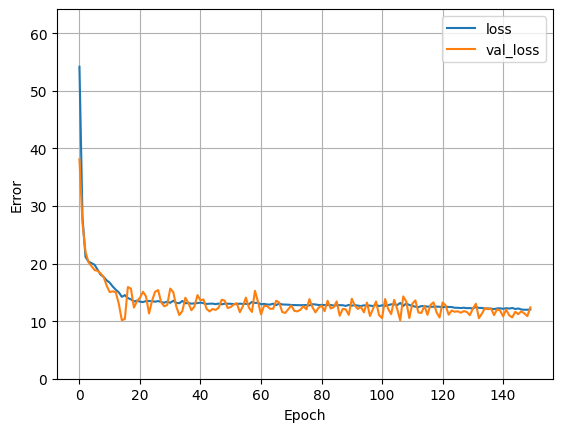

In [ ]:
plot_loss(history)

In [ ]:
i = 120
x_test = X_train[i]
y_test = Y_train[i]
model.predict(x_test), y_test

1/1 [==============================] - 0s 99ms/step


(array([[70.81865]], dtype=float32), 81.0)

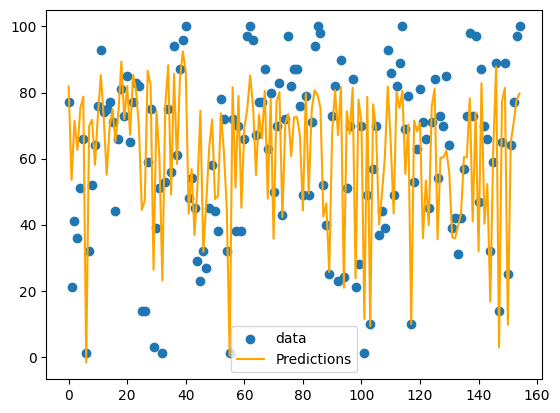

In [ ]:
plt.scatter(x, Y_train, label="data")
plt.plot(x, predictions, label="Predictions", color="orange")
plt.legend()